In [104]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## **1. Import thư viện:** 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


## **2. Đọc dữ liệu và khám phá tổng quan**

In [106]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [107]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [108]:
display(train.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


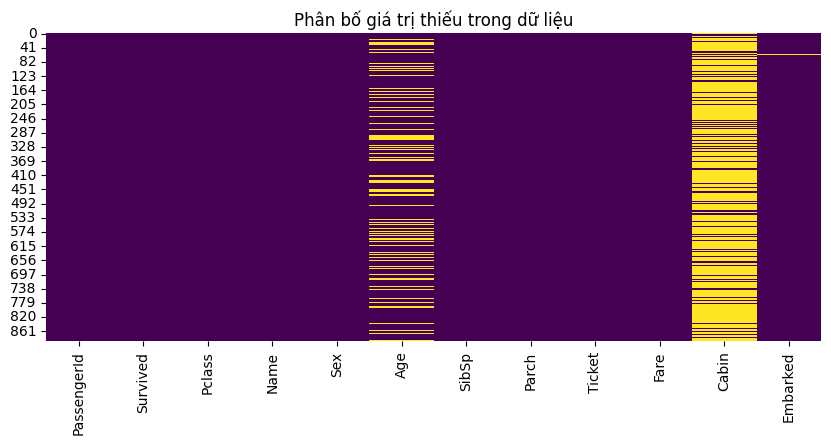

In [110]:
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Phân bố giá trị thiếu trong dữ liệu")
plt.show()


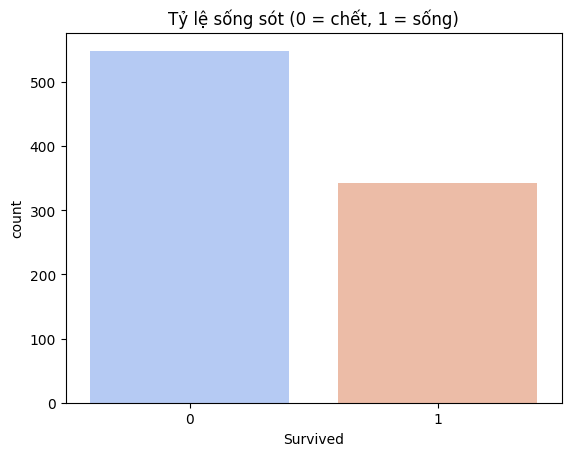

In [111]:
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.title("Tỷ lệ sống sót (0 = chết, 1 = sống)")
plt.show()


## **3. Phân tích khám phá dữ liệu**

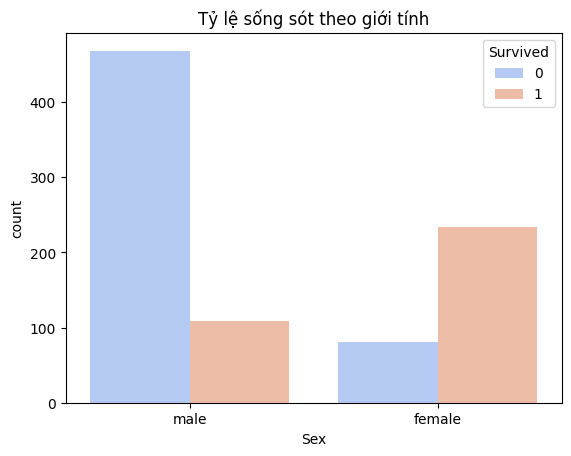

In [112]:
sns.countplot(x='Sex', hue='Survived', data=train, palette='coolwarm')
plt.title("Tỷ lệ sống sót theo giới tính")
plt.show()


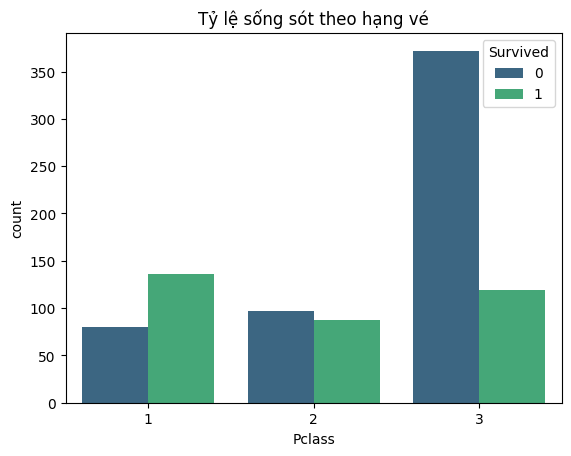

In [113]:
sns.countplot(x='Pclass', hue='Survived', data=train, palette='viridis')
plt.title("Tỷ lệ sống sót theo hạng vé")
plt.show()


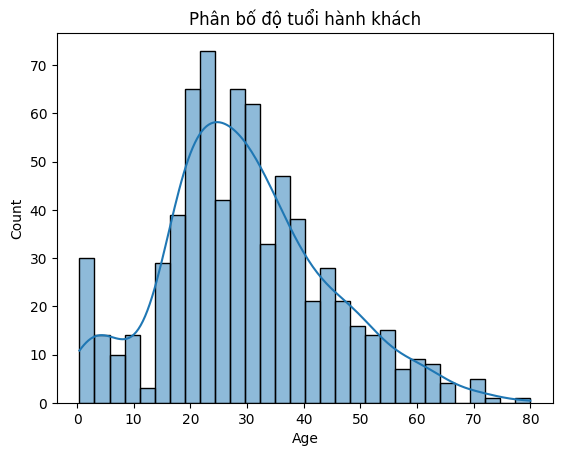

In [114]:
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Phân bố độ tuổi hành khách")
plt.show()

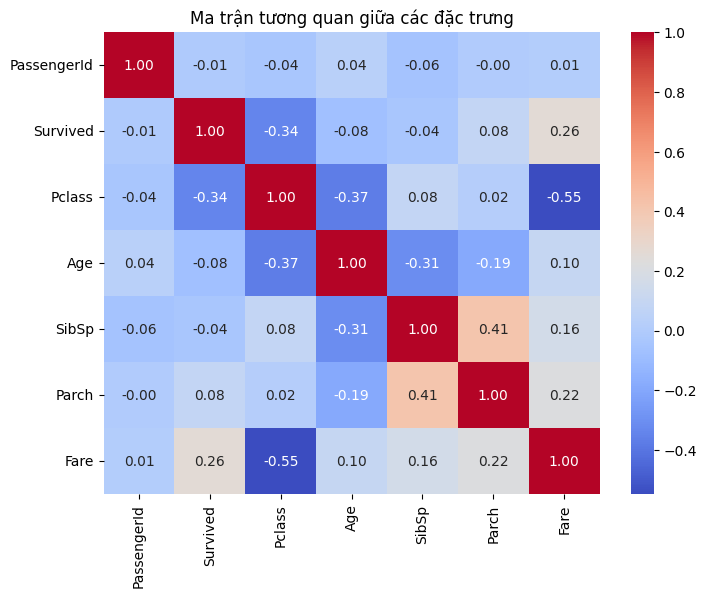

In [115]:
plt.figure(figsize=(8,6))
sns.heatmap(train.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()


## **3. Tiền xử lý dữ liệu**

In [116]:
# Điền giá trị thiếu
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Mã hóa giới tính & cảng lên tàu
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

# Tạo cột FamilySize = SibSp + Parch + 1
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Chọn đặc trưng
features = ["Pclass","Sex","Age","Fare","SibSp","Parch","Embarked","FamilySize"]
X = train[features]
y = train["Survived"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test[features])


## **4. Chia dữ liệu và huấn luyện mô hình**

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.8045
Random Forest: Accuracy = 0.8156
SVM: Accuracy = 0.8156
KNN: Accuracy = 0.8212
Gradient Boosting: Accuracy = 0.8045


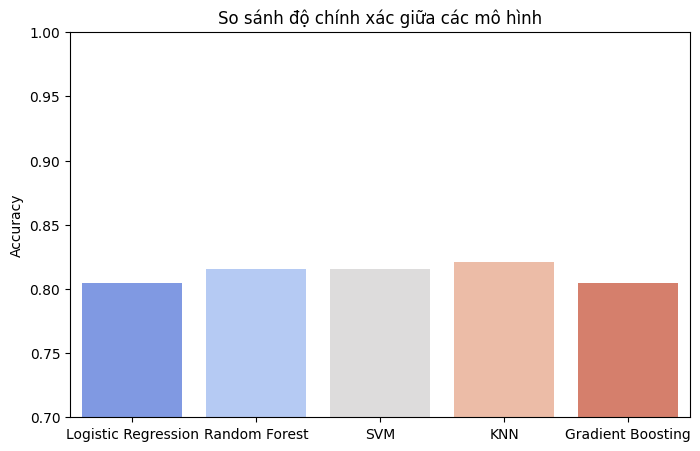

In [118]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.title("So sánh độ chính xác giữa các mô hình")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()


## **5. Đánh giá chi tiết mô hình tốt nhất**

In [119]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Mô hình tốt nhất: {best_model_name}")

y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)


Mô hình tốt nhất: KNN
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



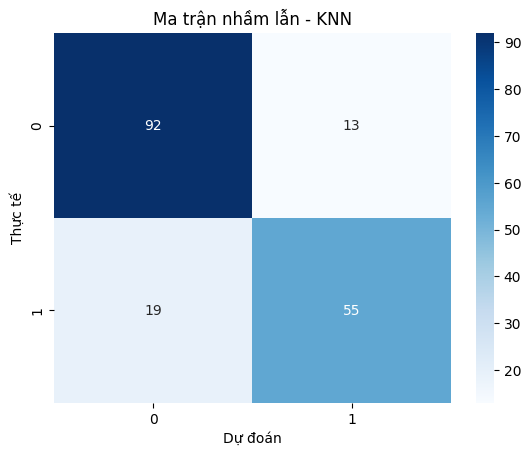

In [120]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Ma trận nhầm lẫn - {best_model_name}")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [121]:
y_prob = best_model.predict_proba(X_val)[:, 1]

# ROC
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

# PR
precision, recall, _ = precision_recall_curve(y_val, y_prob)
pr_auc = auc(recall, precision)

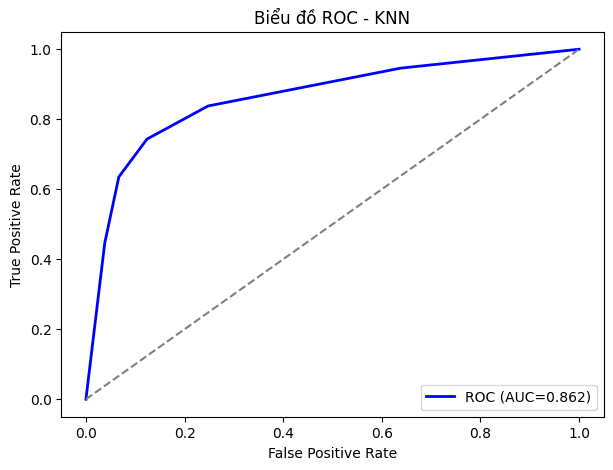

In [122]:
# Vẽ ROC
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title(f"Biểu đồ ROC - {best_model_name}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

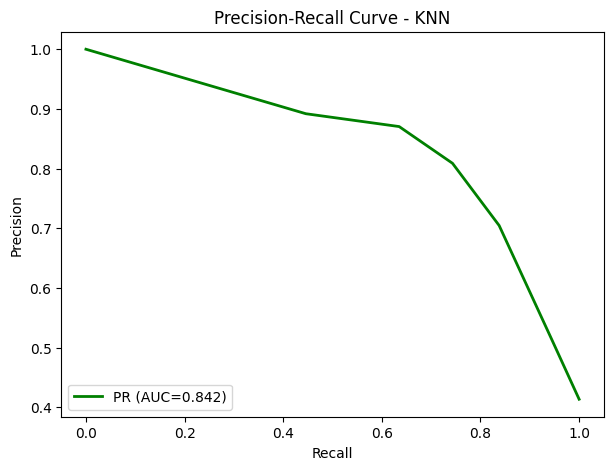

In [123]:
# Vẽ PR
plt.figure(figsize=(7,5))
plt.plot(recall, precision, color='green', lw=2, label=f"PR (AUC={pr_auc:.3f})")
plt.title(f"Precision-Recall Curve - {best_model_name}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

## **6. Kết quả**

In [124]:
final_pred = best_model.predict(X_test_scaled)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": final_pred
})

submission.to_csv("submission.csv", index=False)
print("✅ File submission.csv đã được tạo thành công!")


✅ File submission.csv đã được tạo thành công!
